In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [8]:
cc_data = pd.read_csv("/content/Untitled Folder/CC GENERAL.csv")
cc_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [11]:
scaler = StandardScaler()
cc_data_scale = cc_data[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']] 
cc_data_scale

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,40.900749,95.40,0.00,95.40
1,3202.467416,0.00,0.00,0.00
2,2495.148862,773.17,773.17,0.00
3,1666.670542,1499.00,1499.00,0.00
4,817.714335,16.00,16.00,0.00
...,...,...,...,...
8945,28.493517,291.12,0.00,291.12
8946,19.183215,300.00,0.00,300.00
8947,23.398673,144.40,0.00,144.40
8948,13.457564,0.00,0.00,0.00


In [12]:
cc_data_scale = scaler.fit_transform(cc_data_scale)
cc_data_scale.shape

(8950, 4)

In [14]:
cc_data_scale[:5]

array([[-0.73198937, -0.42489974, -0.35693402, -0.34907882],
       [ 0.78696085, -0.46955188, -0.35693402, -0.45457623],
       [ 0.44713513, -0.10766823,  0.10888851, -0.45457623],
       [ 0.04909914,  0.23205785,  0.54618946, -0.45457623],
       [-0.3587753 , -0.46206305, -0.34729428, -0.45457623]])

In [15]:
data = pd.DataFrame(cc_data_scale)
data.rename(columns={0:"BALANCE", 1:"PURCHASES", 2:"ONEOFF_PURCHASES", 3:"INSTALLMENTS_PURCHASES"}, inplace=True)

data_cluster = data.copy()
data.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,-0.731989,-0.424900,-0.356934,-0.349079
1,0.786961,-0.469552,-0.356934,-0.454576
2,0.447135,-0.107668,0.108889,-0.454576
3,0.049099,0.232058,0.546189,-0.454576
4,-0.358775,-0.462063,-0.347294,-0.454576


In [16]:
data.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,-9.278518e-16,3.916048e-15,2.275424e-15
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-4.695519e-01,-3.569340e-01,-4.545762e-01
25%,-6.900078e-01,-4.510006e-01,-3.569340e-01,-4.545762e-01
50%,-3.320286e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01
75%,2.352559e-01,5.004652e-02,-9.056763e-03,6.366321e-02
max,8.397489e+00,2.248351e+01,2.420107e+01,2.442689e+01


**Kmeans Algoritma**

Text(0, 0.5, 'inertia')

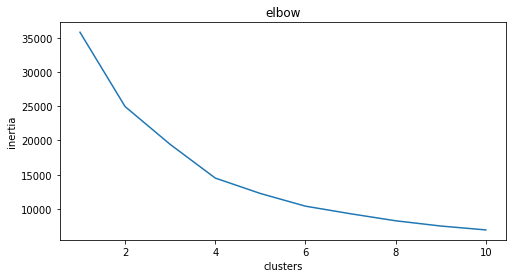

In [17]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)


fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

In [18]:

model_kmeans3 = KMeans(n_clusters=3)
model_KMeans4 = KMeans(n_clusters=4)

model_kmeans3.fit(data)
model_KMeans4.fit(data)

data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_KMeans4.labels_

data_cluster

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,cluster_kmeans3,cluster_kmeans4
0,-0.731989,-0.424900,-0.356934,-0.349079,0,3
1,0.786961,-0.469552,-0.356934,-0.454576,0,3
2,0.447135,-0.107668,0.108889,-0.454576,0,3
3,0.049099,0.232058,0.546189,-0.454576,0,3
4,-0.358775,-0.462063,-0.347294,-0.454576,0,3
...,...,...,...,...,...,...
8945,-0.737950,-0.333293,-0.356934,-0.132643,0,3
8946,-0.742423,-0.329136,-0.356934,-0.122823,0,3
8947,-0.740398,-0.401965,-0.356934,-0.294893,0,3
8948,-0.745174,-0.469552,-0.356934,-0.454576,0,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


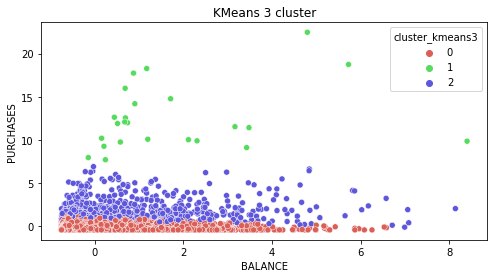

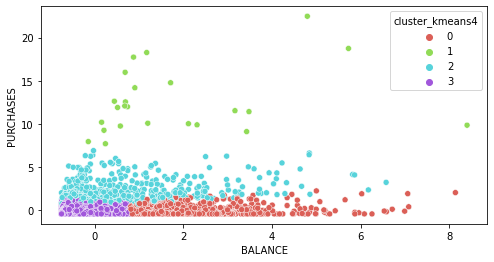

In [19]:

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['BALANCE'], data_cluster['PURCHASES'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls', 3))
plt.title("KMeans 3 cluster")

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['BALANCE'], data_cluster['PURCHASES'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls', 4))
plt.show()

**DBScan**

In [20]:
data


,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,-0.731989,-0.424900,-0.356934,-0.349079
1,0.786961,-0.469552,-0.356934,-0.454576
2,0.447135,-0.107668,0.108889,-0.454576
3,0.049099,0.232058,0.546189,-0.454576
4,-0.358775,-0.462063,-0.347294,-0.454576
...,...,...,...,...
8945,-0.737950,-0.333293,-0.356934,-0.132643
8946,-0.742423,-0.329136,-0.356934,-0.122823
8947,-0.740398,-0.401965,-0.356934,-0.294893
8948,-0.745174,-0.469552,-0.356934,-0.454576


In [23]:
db = DBSCAN(eps=1.2, min_samples=2, metric='euclidean')

db.fit(data)
set(db.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6}

In [24]:
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,cluster_kmeans3,cluster_kmeans4,cluster_dbscan
0,-0.731989,-0.424900,-0.356934,-0.349079,0,3,0
1,0.786961,-0.469552,-0.356934,-0.454576,0,3,0
2,0.447135,-0.107668,0.108889,-0.454576,0,3,0
3,0.049099,0.232058,0.546189,-0.454576,0,3,0
4,-0.358775,-0.462063,-0.347294,-0.454576,0,3,0
...,...,...,...,...,...,...,...
8945,-0.737950,-0.333293,-0.356934,-0.132643,0,3,0
8946,-0.742423,-0.329136,-0.356934,-0.122823,0,3,0
8947,-0.740398,-0.401965,-0.356934,-0.294893,0,3,0
8948,-0.745174,-0.469552,-0.356934,-0.454576,0,3,0


In [25]:
data_cluster.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,cluster_kmeans3,cluster_kmeans4,cluster_dbscan
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000,8950.000000,8950.000000
mean,4.195651e-16,-9.278518e-16,3.916048e-15,2.275424e-15,0.169609,2.540000,-0.000223
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.554800,1.011675,0.174980
min,-7.516398e-01,-4.695519e-01,-3.569340e-01,-4.545762e-01,0.000000,0.000000,-1.000000
25%,-6.900078e-01,-4.510006e-01,-3.569340e-01,-4.545762e-01,0.000000,3.000000,0.000000
50%,-3.320286e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,0.000000,3.000000,0.000000
75%,2.352559e-01,5.004652e-02,-9.056763e-03,6.366321e-02,0.000000,3.000000,0.000000
max,8.397489e+00,2.248351e+01,2.420107e+01,2.442689e+01,2.000000,3.000000,6.000000


In [39]:
# tampilkan plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['BALANCE'], data_cluster['PURCHASES'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',3))
plt.title('DBSCAN Clustering')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

<Figure size 576x288 with 0 Axes>